## Seaborn-Pokemon

In this Jupyter Notebook I will reproduce the Seaborn-Pokemon tutorial that you can find in:
https://elitedatascience.com/python-seaborn-tutorial

In [1]:
# Let's import all we need for this tutorial.

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Notice that in my case I had to use, in order to read the csv, the feature 'encoding = "ISO-8859-1"'.
# I solved this problem thanks to this Stackoverflow's thread:
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

file = pd.read_csv('./pokemon.csv', index_col=0,  encoding = "ISO-8859-1")
df   = pd.DataFrame(file)
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


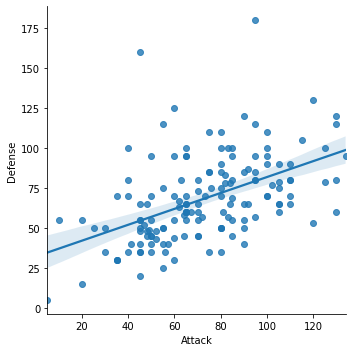

In [3]:
# Quick way to show a scatter plot.
sns.lmplot(x='Attack', y='Defense', data=df)

# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

But this is not good enough. I'm going to tweek some of the features of the lmplot function.

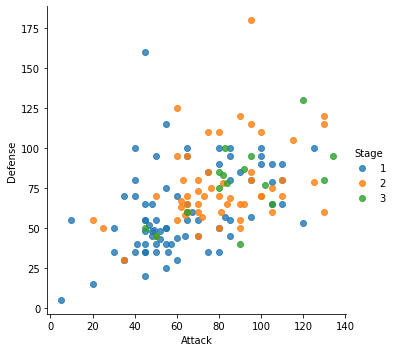

In [5]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

# Here they are fine, but imagine each axis doesnt start at 0 but -20. I can tweak using Matplotlib:
# plt.ylim(0, None)
# plt.xlim(0, None)

Seaborn allows me to use directly Pandas as an input.

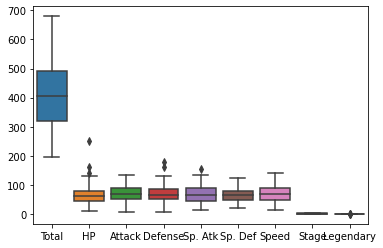

In [6]:
# Boxplot
sns.boxplot(data=df)

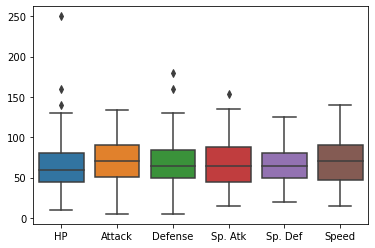

In [7]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

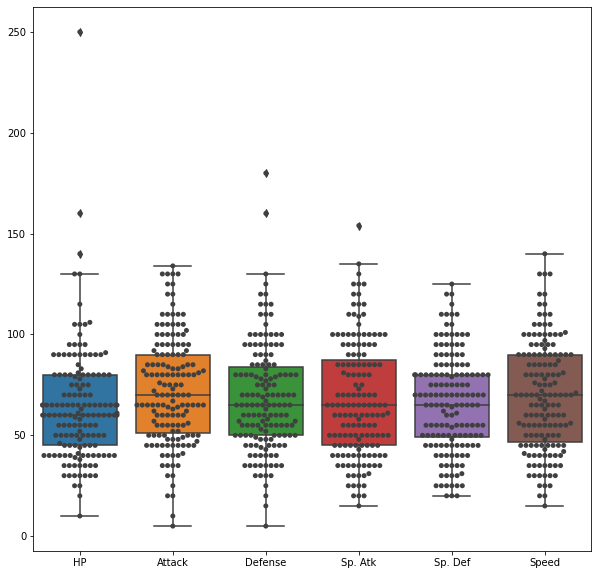

In [15]:
#I want to see the points in this data also.
plt.figure(figsize=(10,10)) #remember to use this command to increase the size of the figure
ax = sns.boxplot(data=stats_df)
ax = sns.swarmplot(data=stats_df, color=".25")

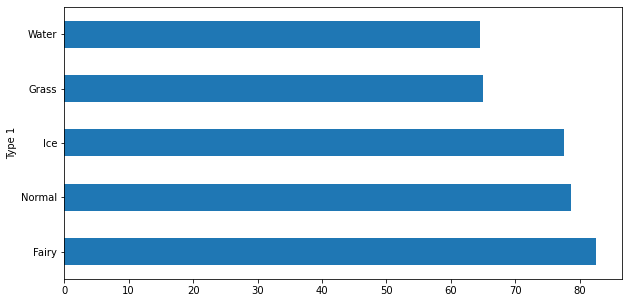

In [40]:
#Lets make some TOPs. People love tops.
df_types = stats_df.groupby(['Type 1'])
df_types['HP'].mean().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10,5))

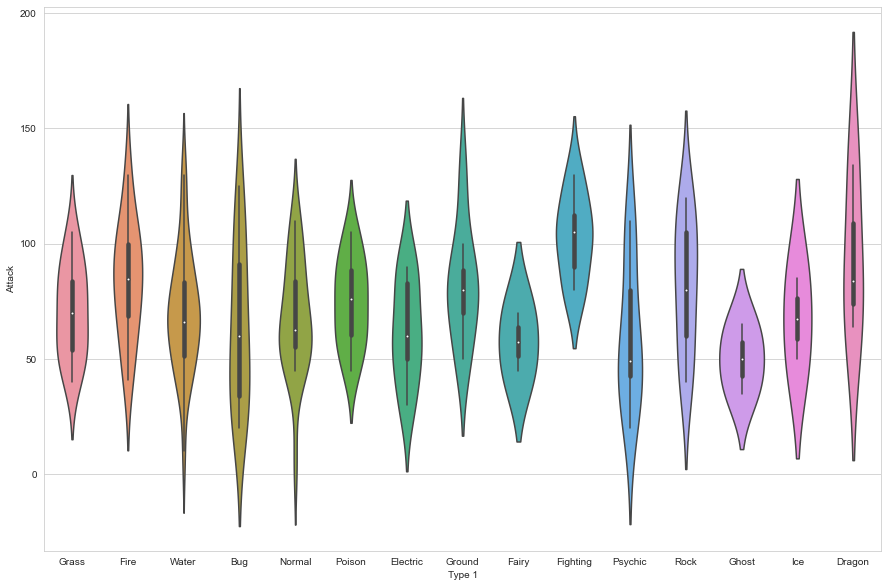

In [43]:
plt.figure(figsize=(15,10))

# Set theme

sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

Let's apply the real pokemon's type colors that we can get from Bulbapedia.

In [44]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

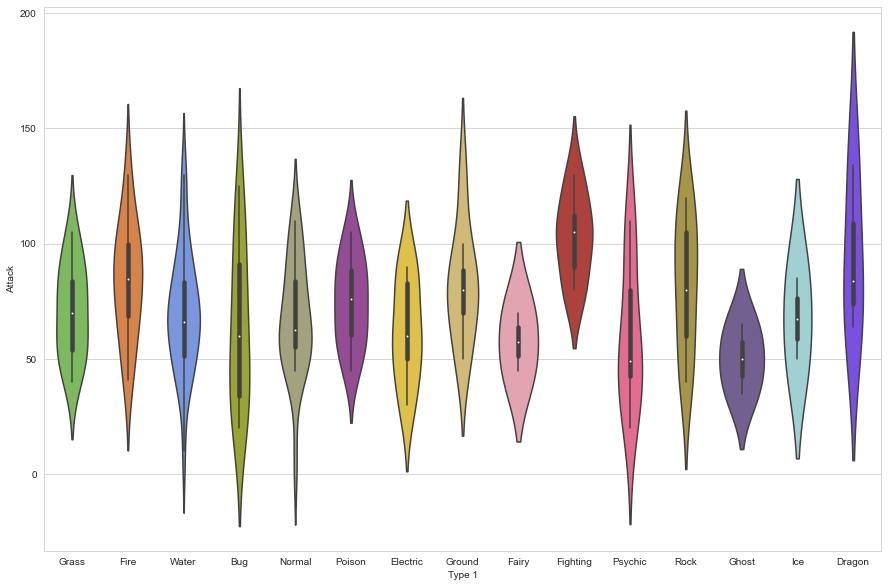

In [46]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(15,10))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

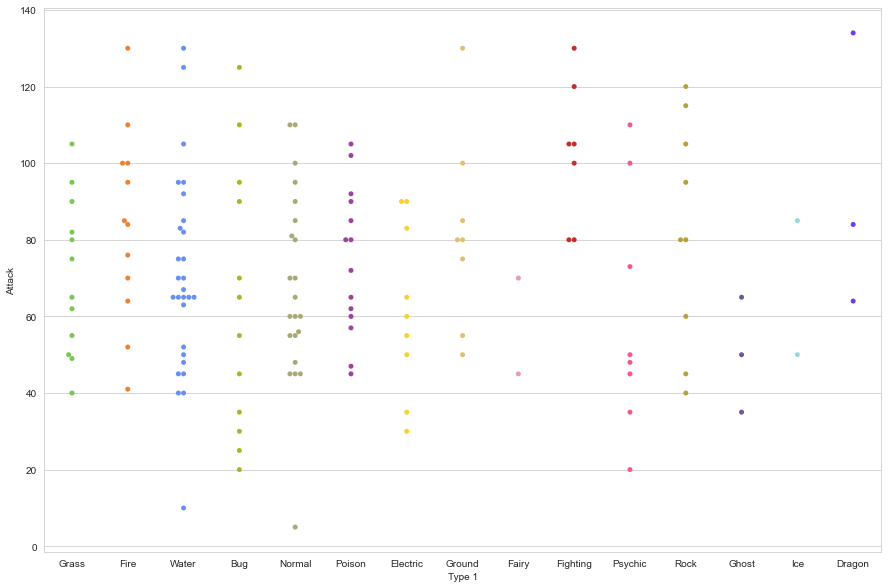

In [48]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(15,10))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Let's combine them, both violin plot and swarnplot.

Text(0.5, 1.0, 'Attack by Type')

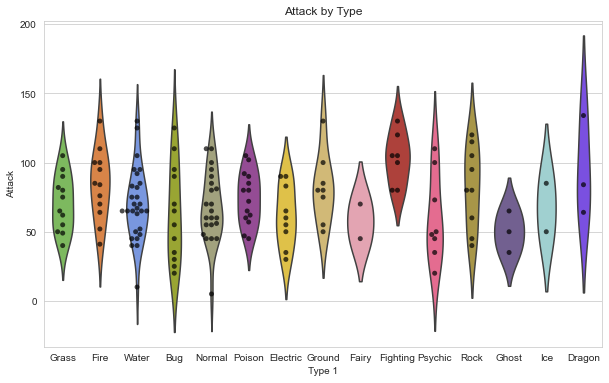

In [49]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')